# Logistic Regression

<h3>About the dataset</h3>
<b>The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.<b>

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


<h3>Reading CSV</h3>

In [5]:
df=pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


<h3>Describing the Database</h3>

In [6]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


<h3>Looking for correlations</h3>

In [12]:
df.corr()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,-0.030656,0.014203,0.077696,0.026710,-0.022994,0.019957,0.017199,0.037411
age,-0.030656,1.000000,0.251171,0.233354,0.201143,0.337396,0.101354,0.110672,0.258008
hypertension,0.014203,0.251171,1.000000,0.121262,0.057237,0.147666,0.080939,0.084429,0.197823
heart_disease,0.077696,0.233354,0.121262,1.000000,0.074818,0.061198,0.067589,0.070066,0.171727
smoking_history,0.026710,0.201143,0.057237,0.074818,1.000000,0.117928,0.032522,0.033038,0.081431
bmi,-0.022994,0.337396,0.147666,0.061198,0.117928,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.019957,0.101354,0.080939,0.067589,0.032522,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.017199,0.110672,0.084429,0.070066,0.033038,0.091261,0.166733,1.000000,0.419558
diabetes,0.037411,0.258008,0.197823,0.171727,0.081431,0.214357,0.400660,0.419558,1.000000


<ul><li>The strong correlation between diabetes diagnosis and blood glucose level is to be expected, as blood glucose levels are a key indicator of diabetes.

<ul><li>The strong correlation between diabetes diagnosed and HbA1c_level is also to be expected, as HbA1c is a measure of blood sugar control.

<h3>Replacing object type columns to integers</h3>

In [8]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [9]:
df['smoking_history'].replace(['never', 'No Info', 'current', 'former', 'ever', 'not current'],[0,0,1,2,3,4],inplace=True)

In [10]:
df['gender'].unique()
df['gender'].replace(['Female', 'Male', 'Other'],[1,2,3],inplace=True)

<h3>Seaborn HeatMap</h3>

<Axes: >

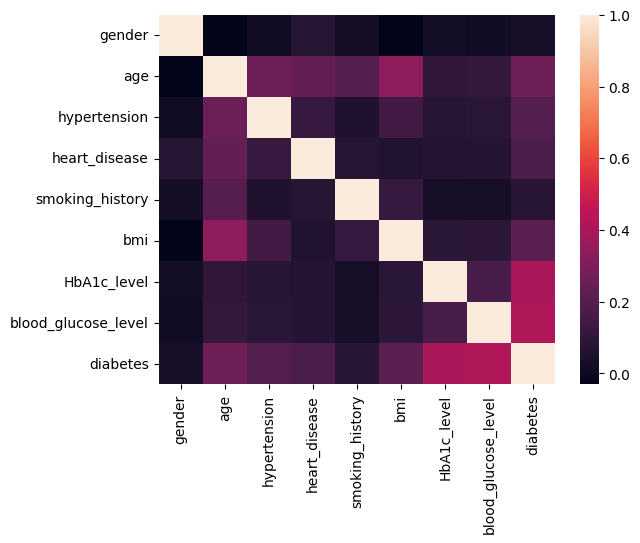

In [14]:
sns.heatmap(df.corr())

<h3>Boxplot using Seaborn</h3>

<Axes: >

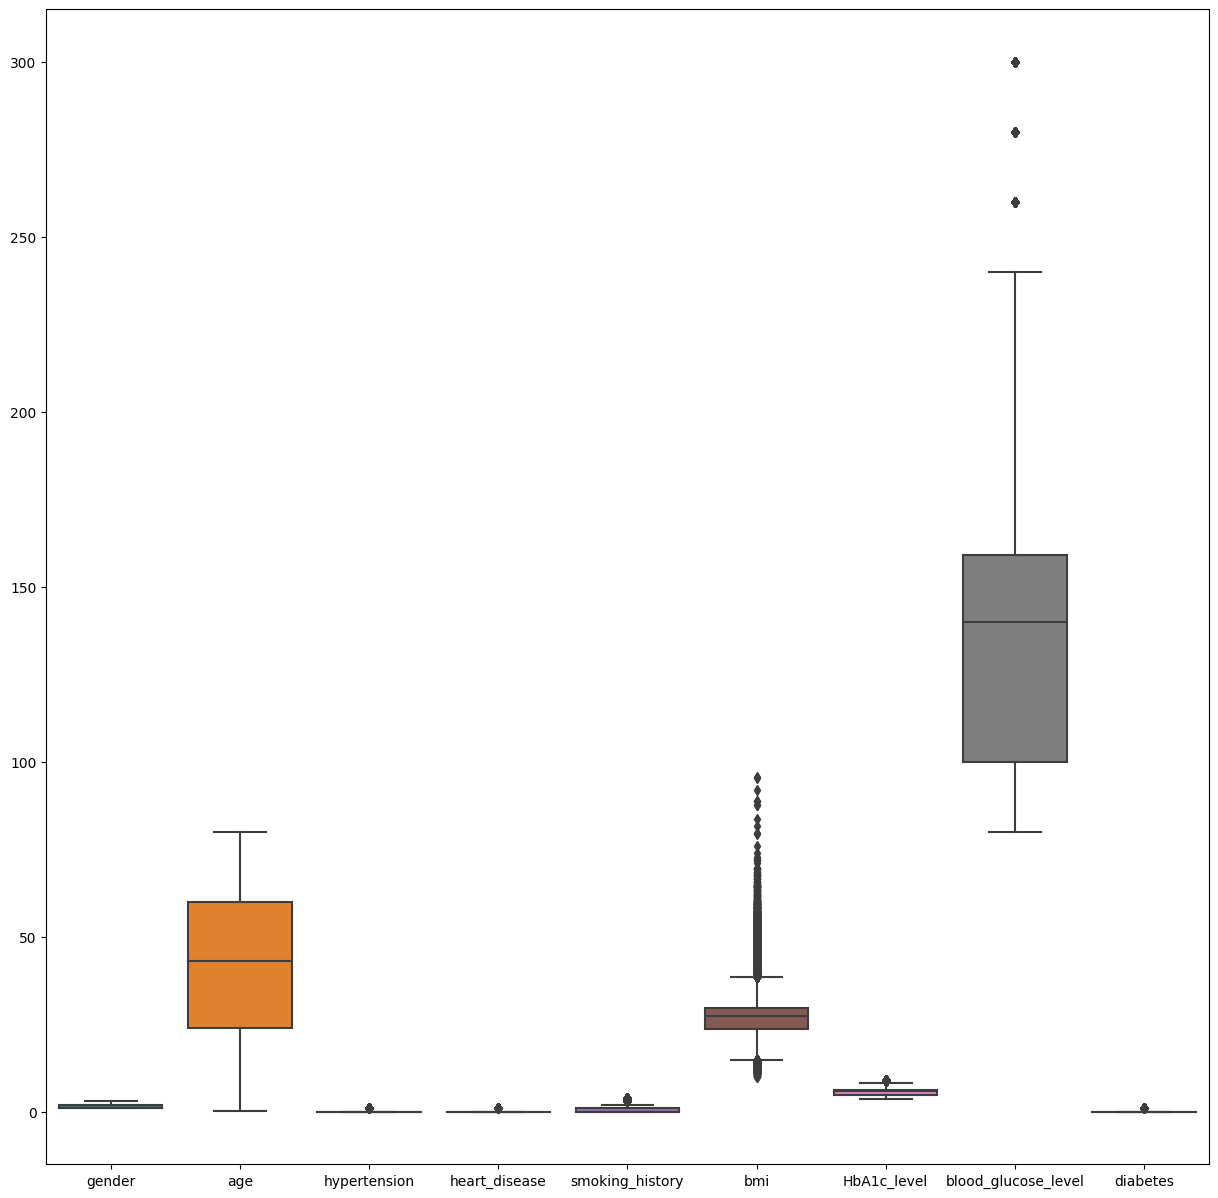

In [95]:
plt.figure(figsize=(15,15))
sns.boxplot(df)

<h3>Finally Training the Logistic Regression Model</h3>

In [55]:
X_train,X_test,y_train,y_test=train_test_split(df[['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level']],df['diabetes'],test_size=0.25)

In [99]:
model=LogisticRegression(max_iter=100000)
model.fit(X_train,y_train)
print(f'{model.score(X_test,y_test)*100} % Accuracy')


95.952 % Accuracy


<h3>Finding the best hyperparameters to see if we can improve the accuracy of our model</h3>

In [ ]:
param_grid = {
    "C": np.logspace(-4, 4, 10),
    "penalty": ["l2"],
}
grid_search = GridSearchCV(model, param_grid, scoring="accuracy", cv=5)
grid_search.fit(X_train, y_train)

In [109]:
score = grid_search.score(X_test, y_test)
print(f'{score*100} % Accuracy after GridSearch')

95.956 % Accuracy after GridSearch


<h2>Conclusion<h2>
<h3>"After performing a grid search, we observed a minor improvement of 0.004%. This improvement may not be significant for most applications, but it could be helpful for critical applications or when using a different dataset."</h3>